In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pystan
%matplotlib inline

In [48]:
df1 = pd.read_csv("input/data-salary-2.txt")
df1.head()

,X,Y,KID
0,7,457,1
1,10,482,1
2,16,518,1
3,25,535,1
4,5,427,1


(0, 1000)

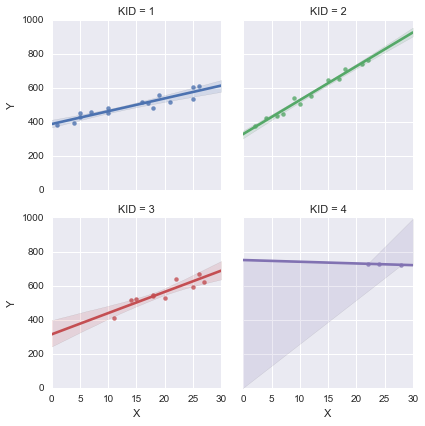

In [49]:
sns.lmplot(x="X", y="Y", data=df1, col="KID", hue="KID",col_wrap=2,size=3)
plt.xlim(0,30)
plt.ylim(0,1000)

In [50]:
data1 = {"N":len(df1), "X":df1.X, "Y":df1.Y}
fit1 = pystan.stan(file="stan/model8-1.stan", data=data1)

In [51]:
fit1

Inference for Stan model: anon_model_f0820d4f93d08370d6c332cf0dac93cf.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

       mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
a    377.08     0.6  22.93 332.06 361.72 376.99 392.04 423.02   1447    1.0
b     10.99    0.03   1.32   8.34  10.12  11.02  11.89  13.61   1464    1.0
s_Y    68.4    0.17   7.67  55.25  63.11  67.68  73.08   85.4   1987    1.0
lp__ -183.9    0.03   1.16 -187.1 -184.5 -183.6 -183.0 -182.6   1631    1.0

Samples were drawn using NUTS at Mon Nov 28 23:18:56 2016.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

#### 8.1.3 グループ毎に傾きを持つ場合

In [52]:
data2 = {"N":len(df1), "K":len(df1.KID.unique()),"X":df1.X, "Y":df1.Y, "KID":df1.KID}
fit2 = pystan.stan(file="stan/model8-2.stan", data=data2, seed=1234)

In [53]:
fit2

Inference for Stan model: anon_model_13ec4bb7b067734d77f923d35ebd7999.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

       mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
a[0] 386.76    0.25  13.81 359.85 377.18  386.8 396.06 413.66   2983    1.0
a[1] 329.21     0.3  16.56 296.62 318.41 328.85 339.98 361.66   3043    1.0
a[2] 314.69    0.69  33.22 249.99 292.51 314.55 337.06 380.65   2315    1.0
a[3] 750.55    2.96 158.51 431.68 646.44 748.45 855.36 1071.6   2875    1.0
b[0]   7.54    0.02   0.85   5.83   6.97   7.54    8.1    9.2   2991    1.0
b[1]  19.82    0.02   1.22  17.46  18.99  19.83  20.66  22.22   3041    1.0
b[2]  12.43    0.03   1.64   9.22  11.35  12.45  13.49  15.64   2288    1.0
b[3]  -1.02    0.12   6.39 -13.96  -5.26  -0.96   3.22  11.82   2902    1.0
s_Y   27.17    0.06   3.49  21.24  24.75  26.87  29.33  34.76   2951    1.0
lp__ -147.9    0.07   2.31 -153.4 -149.3 -147.6 -14

会社毎の直線の傾きと切片a,bはわかったが、a,bについての仮定がないため、a,bの会社間の差がどれほどあるか推定できない。そのため、このデータに含まれていない会社について、切片傾きがいくらになりそうかと言う問いに答えられない。
また、b[3]について、傾きがマイナスとなり、過学習している。

#### 8.1.4 階層モデル

In [54]:
data3 = {"N":len(df1), "K":len(df1.KID.unique()),"X":df1.X, "Y":df1.Y, "KID":df1.KID}
fit3 = pystan.stan(file="stan/model8-3.stan", data=data3, seed=1234)

In [55]:
fit3

Inference for Stan model: anon_model_7d1fed9927952e90449cc3742d07c8a9.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
a0    382.55    9.91 145.32 137.85 337.64 367.96 411.85 748.89    215   1.01
ak[0]   0.55    9.89 145.06 -360.2 -27.61  11.57  44.16 246.82    215   1.01
ak[1] -47.41    9.94 146.38 -426.9 -78.51  -30.7   0.24 193.98    217   1.01
ak[2]  -59.2    9.88 147.56 -433.4 -96.32 -39.95  -3.89 181.98    223   1.01
ak[3] 102.24    8.98 172.44 -124.9   8.67  66.07 160.32 514.44    369   1.01
b0     12.59    0.32   8.73  -0.88   9.63  12.61  15.42   26.9    752    1.0
bk[0]  -4.83    0.32   8.74 -19.24  -7.59  -4.65  -1.86   8.43    753    1.0
bk[1]   6.79    0.32   8.77  -7.15   3.74   6.69   9.85  20.71    757    1.0
bk[2]  -0.59    0.32   8.78 -14.43  -3.55  -0.53   2.52  13.48    765    1.0
bk[3]  -2.94    0.42   9.84 -22.27  -6.28

#### 8.1.5 モデルの比較

In [56]:
ms1 = fit1.extract()
ms2 = fit2.extract()
ms3 = fit3.extract()

In [78]:
a1 = ms1["a"].T
a2 = ms2["a"].T
a3 = ms3["a"].T
b1 = ms1["b"].T
b2 = ms2["b"].T
b3 = ms3["b"].T
a1_med = np.percentile(a1,[50])
b1_med = np.percentile(b1,[50])
df_parama2 = pd.DataFrame([np.r_[k+1, np.percentile(x,[2.5, 25, 50, 75, 97.5])] for k, x in enumerate(a2)] ,columns=["KID", "p2.5", "p25", "p50", "p75", "p97.5"])
df_parama3 = pd.DataFrame([np.r_[k+1, np.percentile(x,[2.5, 25, 50, 75, 97.5])] for k, x in enumerate(a3)] ,columns=["KID", "p2.5", "p25", "p50", "p75", "p97.5"])
df_paramb2 = pd.DataFrame([np.r_[k+1, np.percentile(x,[2.5, 25, 50, 75, 97.5])] for k, x in enumerate(b2)] ,columns=["KID", "p2.5", "p25", "p50", "p75", "p97.5"])
df_paramb3 = pd.DataFrame([np.r_[k+1, np.percentile(x,[2.5, 25, 50, 75, 97.5])] for k, x in enumerate(b3)] ,columns=["KID", "p2.5", "p25", "p50", "p75", "p97.5"])

(0.9, 4.1)

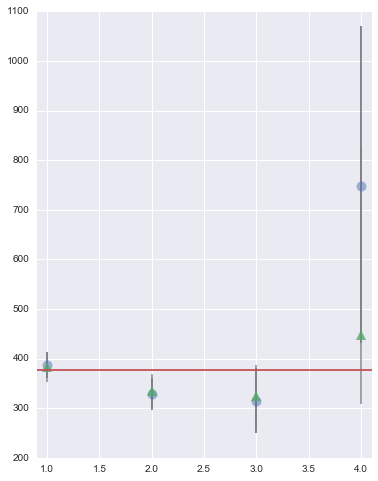

In [79]:
xlim = (0.9,4.1)
palette = sns.color_palette()
fig = plt.figure(figsize=(6,8))
ax = fig.add_subplot(1,1,1)
ax.errorbar(df_parama2.KID, df_parama2.p50, yerr=[df_parama2.p50 - df_parama2["p2.5"], df_parama2["p97.5"] - df_parama2.p50],
    fmt='o', ecolor='black', ms=10, mfc=palette[0], alpha=0.5, marker='o')
ax.errorbar(df_parama3.KID, df_parama3.p50, yerr=[df_parama3.p50 - df_parama3["p2.5"], df_parama3["p97.5"] - df_parama3.p50],
    fmt='o', ecolor='gray', ms=10, mfc=palette[1], alpha=0.8, marker='^')
ax.plot(xlim , (a1_med,a1_med))
ax.set_xlim(xlim)

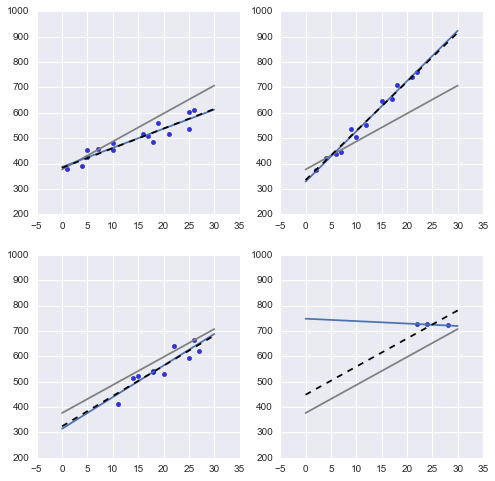

In [104]:
xlim = (0,30)
fig = plt.figure(figsize=(8,8))
for k in range(4):
    idx = k + 1
    if ax == None:
        ax = fig.add_subplot(2, 2, idx)
    else:
        ax = fig.add_subplot(2, 2, idx, sharey=ax)
    d1 = df1[df1.KID == idx]
    da2 = df_parama2[df_parama2.KID == idx]
    da3 = df_parama3[df_parama3.KID == idx]
    db2 = df_paramb2[df_paramb2.KID == idx]
    db3 = df_paramb3[df_paramb3.KID == idx]
    ax.scatter(d1.X, d1.Y, alpha=0.8)
    ax.plot(xlim,(xlim[0] * b1_med +a1_med, xlim[1] * b1_med +a1_med), color="gray")
    ax.plot(xlim, (xlim[0] * db2.p50[k] +da2.p50[k], xlim[1] * db2.p50[k] +da2.p50[k]))
    ax.plot(xlim, (xlim[0] * db3.p50[k] +da3.p50[k], xlim[1] * db3.p50[k] +da3.p50[k]), "k--")

#### 8.1.6 階層モデルの等価な表現

In [106]:
data4 = {"N":len(df1), "K":len(df1.KID.unique()),"X":df1.X, "Y":df1.Y, "KID":df1.KID}
fit4 = pystan.stan(file="stan/model8-4.stan", data=data4, seed=1234)

In [107]:
fit4

Inference for Stan model: anon_model_92a2d3b6fb2ec0c10dc689b35f85d9ee.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

       mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
a0   384.62    2.59  108.6  184.3 335.83 369.28 421.17  658.0   1761    1.0
a[0] 384.23    0.34  14.76 353.31 374.78 384.47 393.96 413.37   1859    1.0
a[1] 333.58     0.4  16.68 300.97 322.18 333.68 344.89 365.85   1771   1.01
a[2] 323.69    0.79  32.66 258.41  302.5 324.53 346.18 386.06   1719    1.0
a[3] 489.62    4.63 132.62 306.69 384.74 459.83  574.0 794.16    820    1.0
b0    12.06    0.36   9.05  -7.11   9.19  12.25  15.29  29.93    629   1.01
b[0]   7.69    0.02    0.9   5.89    7.1   7.67   8.27   9.54   1941    1.0
b[1]   19.5    0.03   1.24   17.1  18.66  19.52  20.33  21.91   1701    1.0
b[2]  11.98    0.04    1.6   8.87  10.88  11.93  13.04  15.21   1778    1.0
b[3]   9.45    0.19   5.33  -2.66   6.08  10.59  13

### 8.2 複数の階層を持つ階層モデル

In [108]:
df2 = pd.read_csv("input/data-salary-3.txt")

In [109]:
df2.head()

,X,Y,KID,GID
0,7,457,1,1
1,10,482,1,1
2,16,518,1,1
3,25,535,1,1
4,5,427,1,1


In [113]:
df2.describe()

,X,Y,KID,GID
count,300.0000,300.000000,300.000000,300.000000
mean,15.1900,692.250000,13.996667,2.033333
std,7.8306,224.188244,8.134940,0.547621
min,0.0000,161.000000,1.000000,1.000000
25%,9.0000,547.500000,7.000000,2.000000
50%,14.0000,670.000000,14.000000,2.000000
75%,21.0000,807.500000,20.250000,2.000000
max,34.0000,1521.000000,30.000000,3.000000


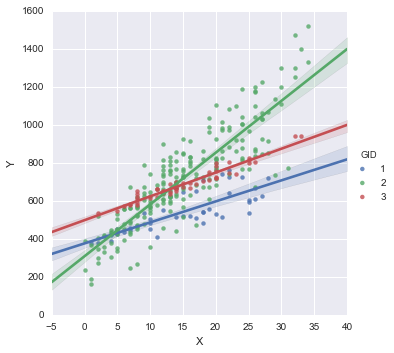

In [112]:
sns.lmplot(x="X",y="Y",data=df2,hue="GID")

In [128]:
K2G = df2[["KID", "GID"]].drop_duplicates().GID.values
data5 = {"N":len(df2), "G":len(df2.GID.unique()),"K":len(df2.KID.unique()),"X":df2.X, "Y":df2.Y, "KID":df2.KID, "K2G":K2G}
fit5 = pystan.stan(file="stan/model8-5.stan", data=data5, seed=1234)

In [130]:
fit5

Inference for Stan model: anon_model_5d549c40408b503f686edb549cb2e4bc.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
a0    416.86    28.1 654.29 -530.8 312.62 395.31 492.12 1755.1    542    1.0
a[0]  365.17    0.92  26.81 310.35 347.72  366.2 382.49 415.44    853    1.0
a[1]  357.61    1.05  28.38 300.33 338.52 358.12 378.32 411.82    732   1.01
a[2]  352.01    1.34   35.7 277.34 329.23 353.63  378.2 418.31    713   1.01
a[3]  364.47    1.01  39.01 286.64 339.87 364.73 386.04 447.57   1493    1.0
a[4]  295.53    1.15  24.79 242.75 280.45 296.37 311.62 343.55    468   1.01
a[5]  327.48    1.41  34.49  273.5 303.87 320.27  346.6 407.86    596   1.01
a[6]  309.39    0.56  19.37 272.98  296.4 309.04 320.94  350.2   1199    1.0
a[7]  301.73    0.65  28.47 243.95  284.7 302.03 318.17 362.64   1923    1.0
a[8]  288.06     1.8  26.94 229.01 271.95

In [134]:
data6 = {"N":len(df2), "G":len(df2.GID.unique()),"K":len(df2.KID.unique()),"X":df2.X, "Y":df2.Y, "KID":df2.KID, "K2G":K2G, "GID":df2.GID}
fit6 = pystan.stan(file="stan/model8-6.stan", data=data6, seed=1234)

In [135]:
fit6

Inference for Stan model: anon_model_fdf160b9aa8fb1ea692feb9c6e421d40.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

         mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
a0     392.94    5.38 205.67  -41.9 314.87 390.75 467.37 878.55   1463    1.0
a[0]    383.0    0.28  15.11  353.1  372.6 383.28 393.45 411.45   2872    1.0
a[1]   334.89    0.34  17.75 299.72 323.17 334.82 346.27 370.12   2785    1.0
a[2]   325.04    0.67  32.71 257.37 304.45 325.72  347.0 386.19   2378    1.0
a[3]   467.38    4.03  123.8 305.59 374.51 435.47 538.01 767.84    942    1.0
a[4]   293.37    0.57  30.21 229.31 274.62 294.02 312.06  354.2   2769    1.0
a[5]   332.56    1.48  43.57 265.19 301.14 325.75 358.41 436.39    862    1.0
a[6]   309.84    0.65  24.43 265.57 292.77 308.78 325.83 360.36   1407    1.0
a[7]   301.42    0.81   36.3 231.35 279.58 300.66 322.39 379.04   2021    1.0
a[8]   284.82    0.72  33.12 20

### 8.3 非線形モデルの階層モデル

In [136]:
df3 = pd.read_csv("input/data-conc-2.txt")

In [137]:
df3.head()

,PersonID,Time1,Time2,Time4,Time8,Time12,Time24
0,1,2.4,5.0,7.5,11.9,12.5,12.7
1,2,1.4,3.9,4.4,7.7,6.4,8.3
2,3,5.2,9.4,19.4,20.2,22.7,24.9
3,4,6.7,12.6,19.1,23.4,25.8,26.1
4,5,0.3,4.7,7.0,10.2,12.9,14.8


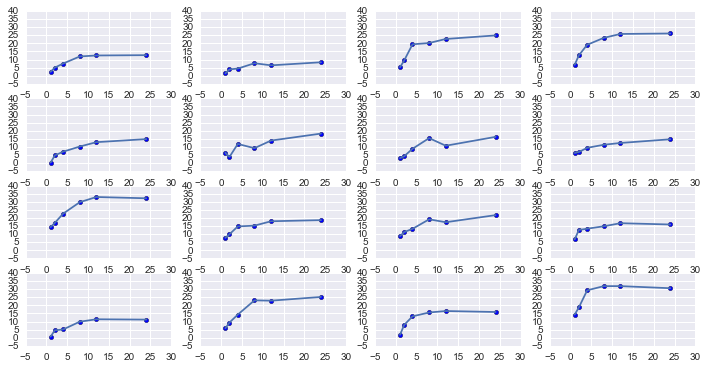

In [140]:
fig = plt.figure(figsize=(12,6))
time = [1,2,4,8,12,24]
for i in df3.PersonID:
    if ax == None:
        ax = fig.add_subplot(4,4,i)
    else:
        ax = fig.add_subplot(4,4,i,sharey=ax)
    ax.scatter(time, df3.iloc[i -1,1:].values)
    ax.plot(time, df3.iloc[i -1,1:].values)    

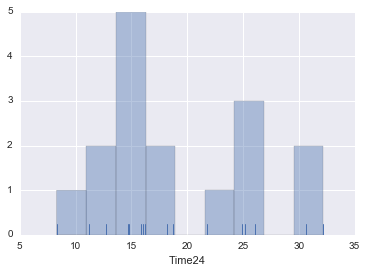

In [150]:
sns.distplot(df3.Time24, bins=9, kde=False, rug=True)

In [161]:
time = [1,2,4,8,12,24]
Time_new = np.arange(0,25)
data7 = {"N":len(df3), "T":len(time), "Time":time, "Y":df3.iloc[:,1:].values, "T_new":len(Time_new), "Time_new":Time_new}
fit7 = pystan.stan(file="stan/model8-7.stan", data=data7, seed=1234)

In [162]:
fit7

Inference for Stan model: anon_model_6c625b482db4695042920f5de78d5b65.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

               mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
a0             2.86  2.1e-3   0.11   2.65   2.79   2.86   2.93   3.08   2690   1.01
b0            -1.17  7.4e-3   0.12  -1.42  -1.25  -1.17  -1.08  -0.96    280   1.01
log_a[0]       2.56  6.3e-3    0.1   2.38   2.49   2.56   2.62   2.75    237   1.01
log_a[1]       2.11  3.7e-3   0.14   1.85   2.02   2.12   2.21   2.39   1413   1.01
log_a[2]       3.17  1.2e-3   0.05   3.08   3.14   3.17    3.2   3.27   1653    1.0
log_a[3]       3.26  8.6e-4   0.04   3.17   3.23   3.26   3.29   3.34   2630    1.0
log_a[4]       2.63  7.1e-3   0.11   2.43   2.56   2.63   2.71   2.86    236   1.01
log_a[5]       2.74  4.8e-3    0.1   2.56   2.68   2.74   2.81   2.94    395   1.01
log_a[6]       2.69  7.1e-3   0.09    2.5   2.63   2.69

In [166]:
ms7 = fit7.extract()
y_new = ms7["y_new"]

In [167]:
y_new.shape

(4000, 16, 25)

In [188]:
panel_time = pd.Panel([np.percentile(y_new[:,n,:],[2.5,50,97.5], axis=0).T for n in range(len(df3))])

In [190]:
panel_time.shape

(16, 25, 3)

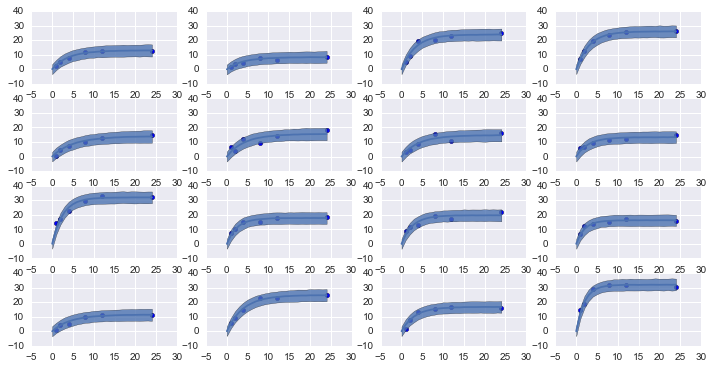

In [198]:
fig = plt.figure(figsize=(12,6))
time = [1,2,4,8,12,24]
Time_new = np.arange(0,25)
for i in df3.PersonID:
    ix = i -1
    if ax == None:
        ax = fig.add_subplot(4,4,i)
    else:
        ax = fig.add_subplot(4,4,i,sharey=ax)
    ax.scatter(time, df3.iloc[ix,1:].values)
    d = panel_time.iloc[ix,:,:]
    ax.plot(Time_new, d.iloc[:,1])
    ax.fill_between(Time_new, d.iloc[:,0], d.iloc[:,2],alpha=0.8)

#### 8.4 ロジスティック回帰の階層モデル

In [2]:
df41 = pd.read_csv("input/data-attendance-4-1.txt")
df42 = pd.read_csv("input/data-attendance-4-2.txt")

In [5]:
df41.head(2)

,PersonID,A,Score
0,1,0,69
1,2,1,145


In [6]:
df42.head(2)

,PersonID,CourseID,Weather,Y
0,1,3,B,1
1,1,9,A,1


In [13]:
N = len(df41.PersonID.unique())
C = len(df42.CourseID.unique())
I = len(df42)
A = df41.A
Score = df41.Score / 200
PID = df42.PersonID
CID = df42.CourseID
W = df42.Weather.map({"A":0, "B":0.2, "C":1})
Y = df42.Y
data84 = {"N":N, "C":C, "I":I, "A":A, "Score":Score, "PID":PID, "CID":CID, "W":W, "Y":Y}
fit84 = pystan.stan(file="stan/model8-8.stan", data=data84, seed=1234)

In [14]:
fit84

Inference for Stan model: anon_model_a312f7cd7ec04837753907981125bcc5.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

            mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
b[0]        0.77    0.02   0.59  -0.43   0.37   0.79   1.16   1.91    958    1.0
b[1]        -0.8  2.8e-3   0.15  -1.11  -0.91   -0.8   -0.7   -0.5   3051    1.0
b[2]        1.74    0.01    0.6   0.59   1.34   1.74   2.14   2.94   2693    1.0
b[3]       -0.78  2.3e-3   0.15  -1.06  -0.88  -0.78  -0.68  -0.49   4000    1.0
b_P[0]      0.29  4.7e-3    0.3  -0.28   0.09   0.28   0.47   0.91   4000    1.0
b_P[1]     -0.36  4.4e-3   0.28  -0.94  -0.53  -0.35  -0.17   0.15   4000    1.0
b_P[2]     -0.28  5.0e-3   0.32  -0.94  -0.49  -0.27  -0.06    0.3   4000    1.0
b_P[3]       0.4  4.6e-3   0.29  -0.14    0.2   0.39   0.58    1.0   4000    1.0
b_P[4]     -0.01  4.6e-3   0.29   -0.6   -0.2  -0.02   0.18   0.57   4000    1.0
b

In [15]:
ms84 = fit84.extract()

In [16]:
b = ms84["b"]
s_P = ms84["s_P"]
s_C = ms84["s_C"]

In [18]:
df_plot_89 = pd.DataFrame(b, columns=["b1", "b2", "b3", "b4"])
df_plot_89 = df_plot_89.assign(
        s_P=s_P,
        s_C=s_C
)

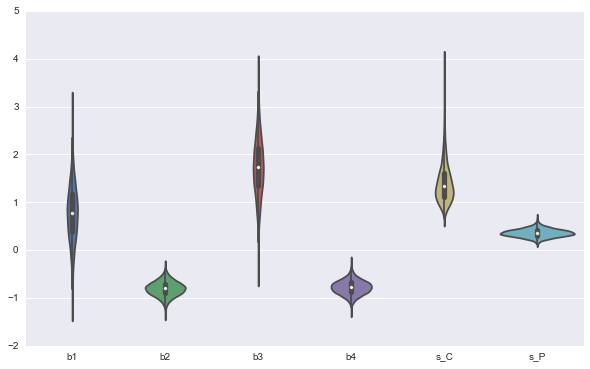

In [23]:
plt.figure(figsize=(10,6))
sns.violinplot(data=df_plot_89)

・b2(バイト好きかどうか), b4(雨かどうか)のマイナスの影響度が同じくらい。

・b3(Score)の95%信頼区間に0が含まれておらず、中央値も2に近いため、正の影響があると言える。

・s_Pは0に近く、個人差の影響はあまりないと考えられる。

・s_Cは1より大きい確率が高く、科目差の影響は大きそう。

###### 科目差のplot.　科目差がどのくらいあるか。

In [24]:
b_C = ms84["b_C"]

In [26]:
b_C.shape

(4000, 10)

/Users/yuki.ohnishi/.pyenv/versions/analysis/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


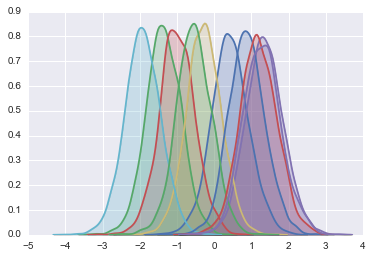

In [30]:
for i in range(b_C.shape[1]):
    sns.kdeplot(b_C[:,i], shade=True, legend=True)

MAP推定値が−2~1.5と約3.5の開きがある。オッズで考えると、exp(3) = 20倍程度の差があることがわかる。

In [35]:
from sklearn.metrics import roc_auc_score, roc_curve
q10, q50, q90 = np.percentile(ms84["q"].T,[10,50,90],axis=1)

In [41]:
tpr50, fpr50, _ = roc_curve(df42.Y, q50)
tpr10, fpr10, _ = roc_curve(df42.Y, q10)
tpr90, fpr90, _ = roc_curve(df42.Y, q90)

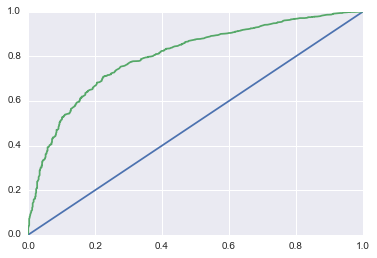

In [44]:
plt.plot([0,1],[0,1])
plt.plot(tpr50, fpr50)

In [45]:
roc_auc_score(df42.Y, q50)

0.8018934576798078

### 練習問題

In [57]:
df1

,X,Y,KID
0,7,457,1
1,10,482,1
2,16,518,1
3,25,535,1
4,5,427,1
5,25,603,1
6,26,610,1
7,18,484,1
8,17,508,1
9,1,380,1


In [58]:
ms2

OrderedDict([('a',
              array([[ 401.51318717,  354.40260075,  288.63339531,  920.09850624],
                     [ 414.25485847,  343.81287126,  301.11096158,  754.36377356],
                     [ 406.24172041,  328.61452345,  244.37103342,  478.94922755],
                     ..., 
                     [ 391.00631663,  343.21916395,  347.61105958,  514.50997427],
                     [ 398.95258855,  356.05435028,  318.93218941,  805.27360687],
                     [ 403.67497538,  328.93399878,  310.2191068 ,  743.51475961]])),
             ('b',
              array([[  6.87332590e+00,   1.83193646e+01,   1.41561896e+01,
                       -8.40396605e+00],
                     [  5.75243990e+00,   1.85255804e+01,   1.36829385e+01,
                        2.76846580e-01],
                     [  6.37781066e+00,   1.99344966e+01,   1.48020259e+01,
                        1.04553856e+01],
                     ..., 
                     [  7.69633026e+00,   1.86413666e+01

In [60]:
a2 = ms2["a"].T
b2 = ms2["b"].T
sigma2 = ms2["s_Y"].T
a3 = ms3["a"].T
b3 = ms3["b"].T
sigma3 = ms3["s_Y"].T

In [63]:
sigma2.shape

(4000,)

In [ ]:
# fig = plt.figure(figsize=(12,12))
# X_new = np.arange(0, 30)
# for i in range(4):
#     ax = fig.add_subplot(2,2,i+1)
#     df_tmp = df1[df1.KID == i+1]
#     ax.plot(df_tmp.X, df_tmp.Y)
#     a_tmp = a[i,:]
    